In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.applications import InceptionV3
from glob import glob

In [6]:
train_path = "C:/Users/Indhuma/Downloads/BIRDS-525-SPECIES-IMAGE-CLASSIFICATION-/BIRDS/train"
test_path = "C:/Users/Indhuma/Downloads/BIRDS-525-SPECIES-IMAGE-CLASSIFICATION-/BIRDS/test"
validation_path = "C:/Users/Indhuma/Downloads/BIRDS-525-SPECIES-IMAGE-CLASSIFICATION-/BIRDS/valid"


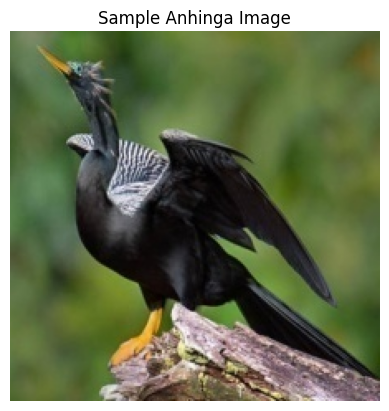

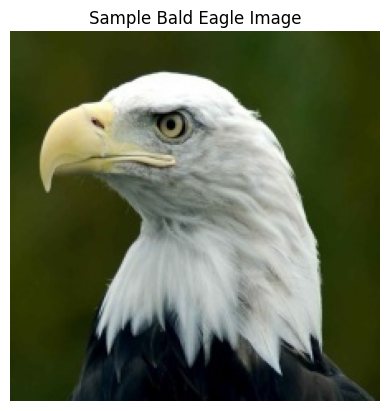

In [7]:
img = load_img(train_path + "/ANHINGA/001.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Anhinga Image")
plt.show()

plt.figure()

img = load_img(train_path + "/BALD EAGLE/018.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Bald Eagle Image")
plt.show()

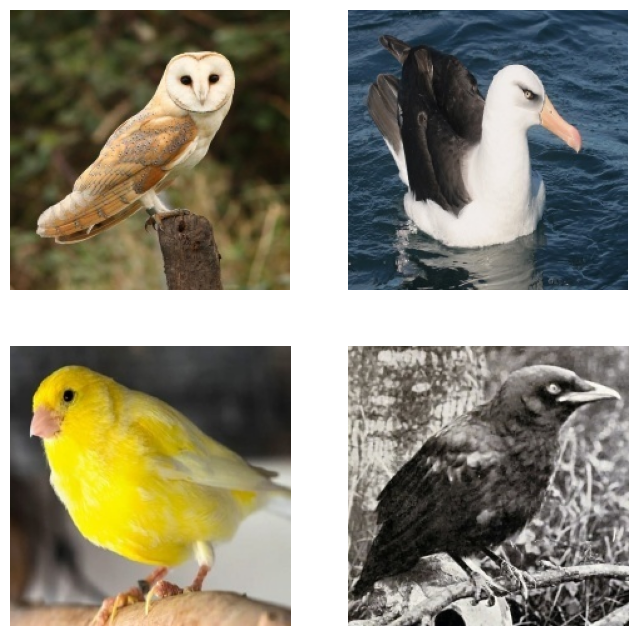

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0,0].imshow(load_img(train_path + "/BARN OWL/018.jpg"))
axs[0,0].axis("off")

axs[0,1].imshow(load_img(train_path + "/ALBATROSS/001.jpg"))
axs[0,1].axis("off")

axs[1,0].imshow(load_img(train_path + "/CANARY/107.jpg"))                        
axs[1,0].axis("off")

axs[1,1].imshow(load_img(train_path + "/CROW/100.jpg"))
axs[1,1].axis("off")

plt.show()

In [9]:
className = glob(train_path + "/*")
NumberofClass = len(className)
print("NumberofClass:", NumberofClass)

NumberofClass: 525


In [10]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [11]:
batch_size = 256
train_datagen = ImageDataGenerator(rescale=1/255,
                  shear_range=0.3,
                  horizontal_flip=True,
                  zoom_range=0.3
                  )
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                train_path,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

val_generator = val_datagen.flow_from_directory(
                validation_path,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [12]:
IncV3 = InceptionV3(include_top = False, weights = "imagenet",input_shape = (224,224,3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [13]:
model = Sequential()

model.add(IncV3)
    
for layer in model.layers:
    layer.trainable = False


model.add(Flatten())

model.add(Dense(units = 2048, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = NumberofClass, activation = "softmax"))

In [14]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [15]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 5,
                    batch_size = batch_size)

C:\Users\Indhuma\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
331/331 ━━━━━━━━━━━━━━━━━━━━ 1920s 6s/step - accuracy: 0.0654 - loss: 9.1128 - val_accuracy: 0.3055 - val_loss: 2.9704
Epoch 2/5
331/331 ━━━━━━━━━━━━━━━━━━━━ 1517s 5s/step - accuracy: 0.1565 - loss: 4.0610 - val_accuracy: 0.4107 - val_loss: 2.4099
Epoch 3/5
331/331 ━━━━━━━━━━━━━━━━━━━━ 1537s 5s/step - accuracy: 0.1873 - loss: 3.7506 - val_accuracy: 0.4495 - val_loss: 2.1666
Epoch 4/5
331/331 ━━━━━━━━━━━━━━━━━━━━ 1526s 5s/step - accuracy: 0.2105 - loss: 3.5773 - val_accuracy: 0.4697 - val_loss: 2.1576
Epoch 5/5
331/331 ━━━━━━━━━━━━━━━━━━━━ 1540s 5s/step - accuracy: 0.2230 - loss: 3.4766 - val_accuracy: 0.4918 - val_loss: 1.9982


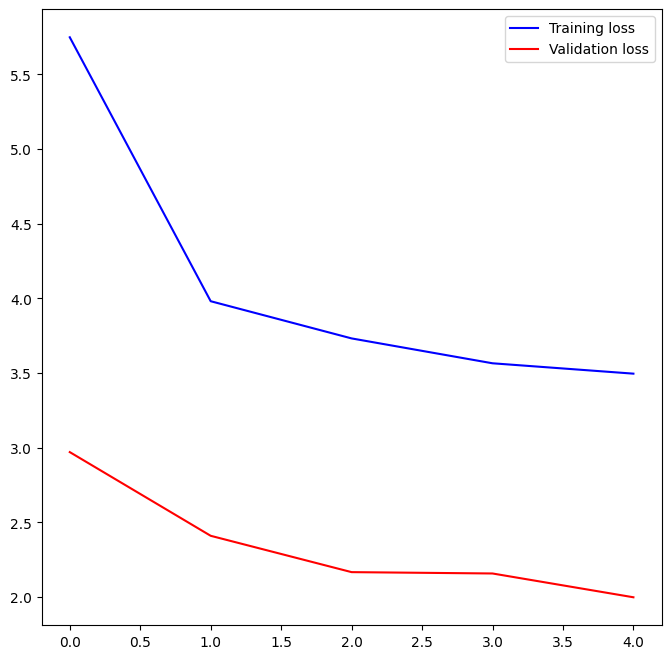

<Figure size 640x480 with 0 Axes>

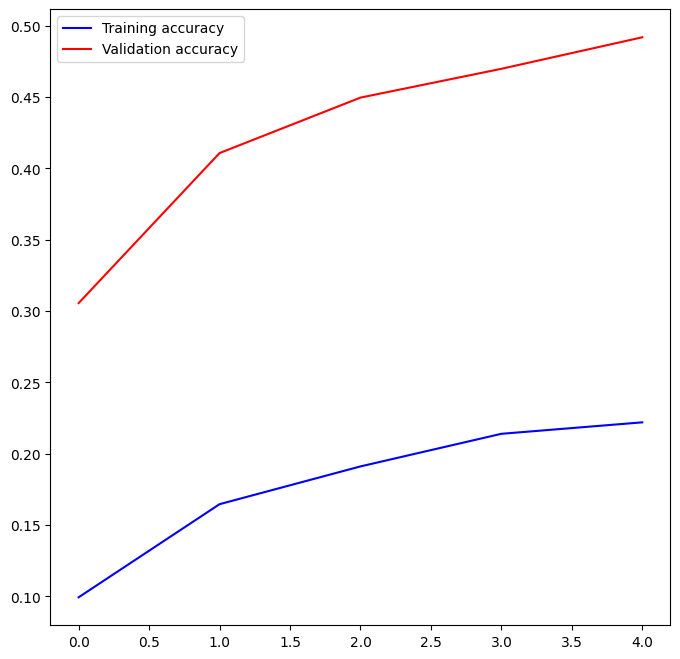

In [16]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend()
plt.show()